#### Check that the SST fileld being read in (in degC) are the same as the fields being written out (in K)
-It seems they are :)

In [50]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob as gb

#from distributed import Client
#from ncar_jobqueue import NCARCluster

In [100]:
dir1 = '/glade/scratch/rneale/archive/'
run1 = 'f.e22.FHIST.f09_f09.cesm2_2.MSMIP_5drandpatt.001'
file1 = dir1+run1+'/atm/hist/'+run1+'.cam.h1.1992-01-01-00000.nc'

dir2 = '/glade/work/rneale/MSMIP/sst/cesm2/'
file2 = dir2+'/sstice_b.e21.BHIST.f09_g17.CMIP6-historical.011_0.9x1.25_yrs1980-2014_daily_timeseries_c20191114_AGCM_5dRandPatt.nc'

In [101]:

ds1 = xr.open_mfdataset(file1, decode_cf=True)
TS1 = ds1['TS'].sel(lat=slice(-5,5)).mean(dim='lat')
TS1=TS1-273.16

In [102]:
ds2 = xr.open_mfdataset(file2, decode_cf=True)
ds2 = ds2.sel(time=slice('1992-01-01','1992-01-31'))
TS2 = ds2['SST_cpl'].sel(lat=slice(-5,5)).mean(dim='lat')
TS2

<xarray.DataArray 'SST_cpl' (time: 31, lon: 288)>
dask.array<mean_agg-aggregate, shape=(31, 288), dtype=float32, chunksize=(31, 288), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1992-01-01 00:00:00 ... 1992-01-31 00:00:00

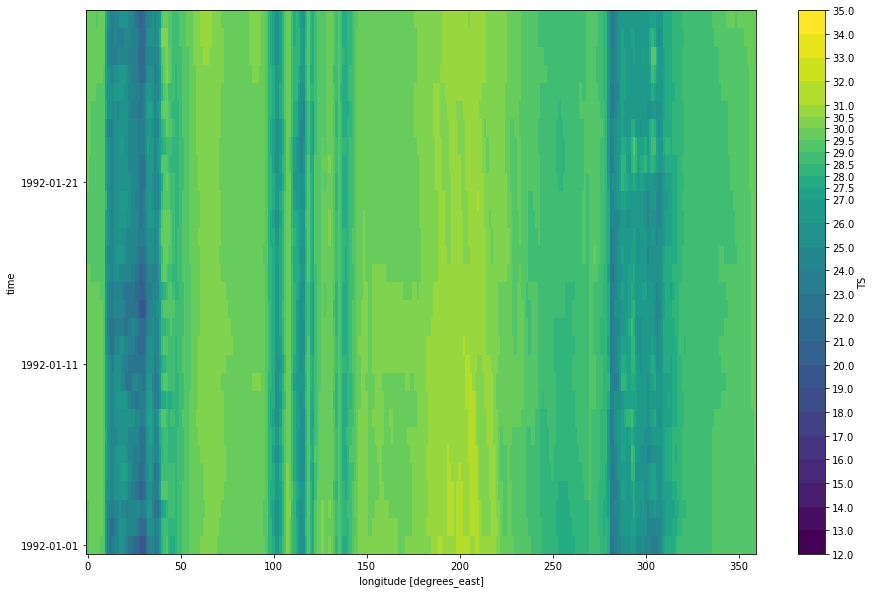

In [103]:
clevels = [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,27.5,28,28.5,29,29.5,30,30.5,31,32,33,34,35]

TS1.plot(size=10,levels=clevels,cbar_kwargs={'ticks': clevels,'spacing': 'proportional'})

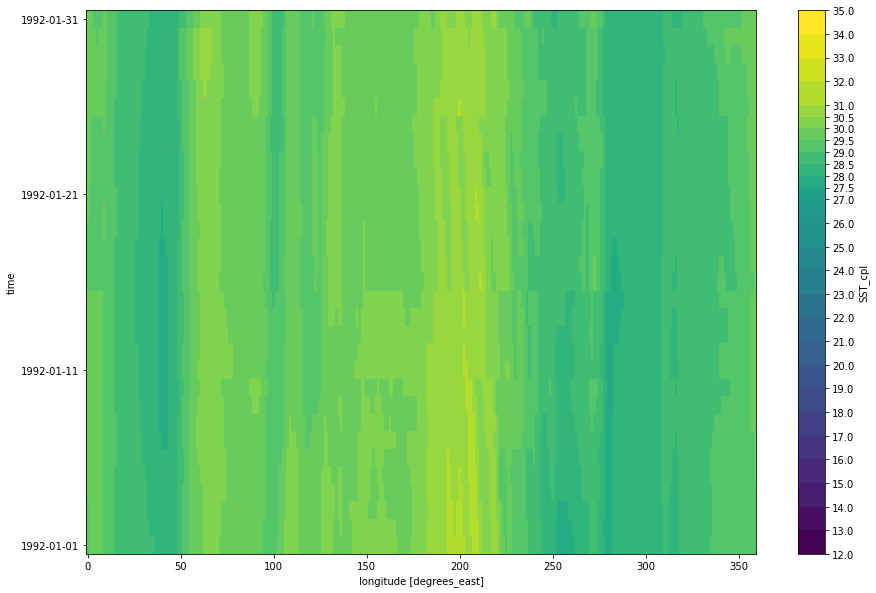

In [104]:
TS2.plot(size=10,levels=clevels,cbar_kwargs={'ticks': clevels,'spacing': 'proportional'})